<a href="https://colab.research.google.com/github/AugustoAnguita/Bioinformatics_UB/blob/main/SESION%204_5/sesion_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizaje Supervisado: Técnicas de Regresión**  




En esta práctica aprenderemos a lanzar modelos de *regresión lineal simple y múltiple* y como realizar selección de características


# **Recordatorio: Introducción al NoteBook**
Dentro de este cuaderno (NoteBook), se te guiará paso a paso desde la carga de un conjunto de datos hasta la realización del análisis de su contenido.

El cuaderno *Jupyter* (Python) es un enfoque que combina bloques de texto (como este) junto con bloques o celdas de código. La gran ventaja de este tipo de celda es su interactividad, ya que pueden ejecutarse para comprobar los resultados directamente en ellas. *Muy importante:* **el orden de las instrucciones es fundamental**, por lo que cada celda de este cuaderno debe ejecutarse secuencialmente. Si se omite alguna, el programa puede dar un error, así que, en caso de duda, debes comenzar desde el principio.

Antes que nada:

Es **muy muy importante** que al inicio selecciones **"*Open in draft mode*" (draft mode)** (modo borrador), en la parte superior izquierda. De lo contrario, no te permitirá ejecutar ningún bloque de código, por motivos de seguridad. Cuando se ejecute el primero de los bloques aparecerá el siguiente mensaje: "*Warning: This notebook was not created by Google.*". No te preocupes, debes confiar en el contenido del cuaderno (NoteBook) y hacer clic en "Run anyway".

¡Vamos allá!

Haz clic en el botón "play" situado a la izquierda de cada celda de código. Las líneas de código que comienzan con una almohadilla (#) son comentarios y no afectan a la ejecución del programa.

También puedes hacer clic en cada celda y presionar "*ctrl+enter*" (*cmd+enter* on Mac).

Cada vez que ejecutes un bloque, verás la salida justo debajo. La información suele estar siempre relacionada con la última instrucción, junto con todos los comandos `print()` que aparezcan en el código.




## **INDICE**
1. [INSTALACION DEL ENTORNO R Y LIBERRIAS](#install-libraries)    
2. [CARGA Y PREPARACION DE DATOS](#load-data)
3. [MODELOS DE REGRESION](#reg1)   
4. [SELECCIÓN ADITIVA DE VARIABLES: ENFOQUE DESCENDENTE](#reg2)   
5. [INTERACCIONES Y NO LINEALIDAD](#reg3)
6. [VALIDACION CRUZADA](#reg4)   
7. [REFERENCIAS](#ref)   
    


## **1. Instalación del Entorno R y Librerías** <a name="install-libraries"></a>

A continuación, instalamos/cargamos las librerías necesarias para esta sesión. En el contexto del análisis del exposoma, las librerías de R nos ofrecen una forma mucho más conveniente de procesar, manipular y analizar los datos. Algunas de estas librerías: `tidyverse`, `skimr`, `readr`.

La instalación de R en nuestro entorno de Google Colab se llevará a cabo en el siguiente bloque de código. Debe recordarse que todas las instalaciones de librerías que realicemos en el entorno de Google Colab permanecerán activas solo durante unas horas, tras lo cual las librerías instaladas se eliminan. Por lo tanto, será necesario volver a ejecutar el código de instalación de librerías de esta sección siempre que se necesite volver a correr el cuaderno después de este tiempo.

Nota: Recomendamos instalar las librerías 5 minutos antes del inicio de la sesión❗❗❗


In [1]:
# first we check the R version we have
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "5.1"

$year
[1] "2025"

$month
[1] "06"

$day
[1] "13"

$`svn rev`
[1] "88306"

$language
[1] "R"

$version.string
[1] "R version 4.5.1 (2025-06-13)"

$nickname
[1] "Great Square Root"

* **Instalar/cargar librerías para la sesión**

Vamos a instalar/cargar las librerías necesarias para la sesión práctica.
Para ello, utilizaremos el paquete `pacman`, que es una herramienta de gestión que combina las funcionalidades de las funciones `install.packages` + `library`.

In [2]:
# Estimated execution time: 3 seconds approx.

install.packages('pacman') # allows us to install/upload packages simultaneously

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Instalaremos `BiocManager` y `rexposome` (estos dos paquetes son esenciales para el análisis del exposoma) utilizando el siguiente código, ya que a veces existen problemas de compatibilidad con la versión de R.

El proceso puede tardar **unos minutos**, por lo que se recomienda realizar la instalación durante la sesión teórica.


In [3]:
# Estimated execution time: 1 minute approx.

if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c("ISLR","ggplot2"
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing ISLR

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'ISLR'

Installing kknn

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'kknn'

also installing the dependency ‘igraph’


Warning message in install.packages(...):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘kknn’ had non-zero exit status”
Installing Cubist

'getOption("repos

In [5]:
# Estimated execution time: 1 minute approx.
# Add all the libraries we need to use (if the package is already installed, it will automatically load the package if it is in the pacman::p_load() function).
pacman::p_load(ISLR,ggplot2)

## **2. Carga y preparación de datos** <a name="load-data"></a>



**1.-** Carga de datos (los datos estan disponibles dentro del repositorio de GitHub de la asignatura).

In [6]:
### Lectura
data <- read.csv(url("https://raw.githubusercontent.com/AugustoAnguita/Bioinformatics_UB/main/SESION%204_5/datasets/homa.csv"))

### Visualización de una pequeña parte de los datos
head(data)

,Sex,Age,Tanner,Height,BMI,WC,TAGmgDL,HDLCmgDL,LDLCmgDL,SBP,DBP,Sedentary,Light,Moderate,Vigorous,HOMA
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,9.5,0,1.55,11.34,60.0,55,51,93,97,60,411.0893,321.5804,22.13393,3.982143,1.98
2,1,8.0,0,1.15,12.40,46.3,51,70,59,90,55,435.6071,316.9762,48.05952,14.273810,0.87
3,0,10.5,0,1.42,12.99,67.5,65,60,96,96,54,483.9048,337.7857,33.30952,7.988095,1.46
4,0,8.1,0,1.27,13.43,53.1,41,78,100,108,46,429.2976,241.9762,39.67857,11.821429,1.07
5,1,10.4,0,1.32,13.72,51.9,39,100,120,107,69,512.0714,216.0357,9.75000,2.410714,0.80
6,0,10.4,0,1.29,14.02,54.9,57,76,73,87,59,451.2321,257.6429,36.40179,9.767857,1.35


Como podemos observar, el comando *head* nos ofrece una visualización de los datos disponibles para los primeros 6 individuos/instancias del conjunto. En esta visualización, podemos identificar variables como el *sexo* de los individuos (el cual viene codificado como 0 si el individuo es un varón, o 1 si es una niña), el *estadío puberal* (representado por la variable "Tanner", y codificado como 0 para el estadío pre-puberal y 1 para el estadío puberal), o la *presión sanguínea* (representada por las variables "DBP" para la tensión diastólica, y "SBP" para la tensión sistólica). Como se puede observar, también se cuenta con variables de sedentarismo, y actividad física ligera, moderada y vigorosa. El resto de variables abreviadas se refieren a: *BMI*, Body Mass Index (o Índice de Masa Corporal traducido al Español); *WC*, Waist Circumference (o Circunferencia de cintura traducido al Español); *TAG*, tliglicéridos; *HDL*, high-density lipoprotein (Colesterol "Bueno"); *LDL*, Low-density lipoprotein (Colesterol "Malo"); estos tres últimos expresados en miligramos/decilitro en sangre.

## **3. MODELOS DE REGRESION** <a name="reg1"></a>


Una vez importadas las librerías y leídos los datos estamos en disposición de ver **qué variables son las más prometedoras** para **aplicar la regresión lineal** en este **problema**. Para estudiar qué variables explican mejor el comportamiento de la variable de salida *HOMA-IR*, se podrían **cálcular las correlaciones** existentes entre ésta y cada una de las variables de entrada (lo cual se lleva a cabo mediante el comando: *cor(data)*). De esta manera, se podrían escoger aquellas que se encuentren más correladas.

Si llevamos a cabo este procedimiento sobre nuestro conjunto de datos, observaremos cómo $SBP$ tiene una correlación más alta con el *HOMA-IR* que otras variables de entrada (por ejemplo $Sex$). Sin embargo, al final de nuestro estudio veremos que $SBP$ no terminará formando parte del modelo final, al contrario que $Sex$ que si entrará como variable seleccionada. La explicación para esto es que la construcción del modelo final no sólo depende de la correlación individual de cara variable de entrada con la variable de salida, sino más bien de lo que aporte cada variable con respecto al resto de variables seleccionadas. Si lo que puede explicar una variable de entrada ya está mejor explicado por otra, ésta no debe formar parte del modelo final.

Una alternativa a lo anterior es **mostrar gráficamente la relación de cada variable de entrada con respecto a la variable de salida** *HOMA-IR*. De esta manera, podemos observar visualmente no sólo si presentan una relación más o menos lineal, sino qué forma tiene la nube de puntos. Por ejemplo, podríamos ver si una variable presenta un comportamiento cuadrático o logarítmico, y por lo tanto sería más apropiado incluir estos términos en el modelo.

En nuestro caso de estudio, optaremos por esta **segunda aproximación**, por considerarla tanto o más informativa. El siguiente bloque de código *R* grafica iterativamente, y por orden, todas las variables de entrada con respecto a la variable de salida (*HOMA-IR*).

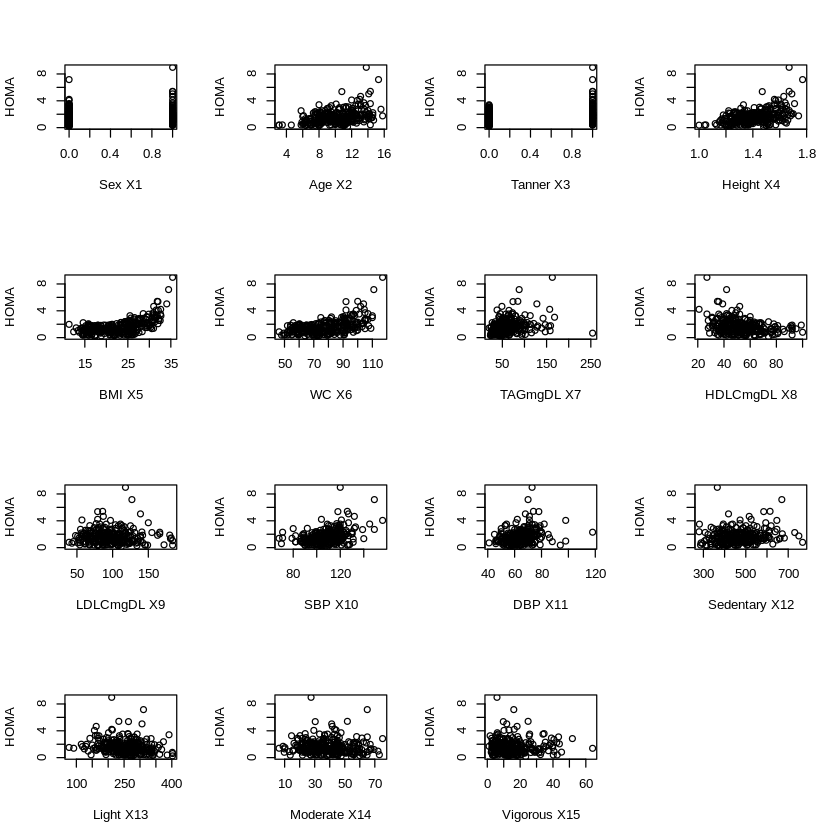

In [7]:
### Visualización de las variable respecto a HOMA
temp <- data
plotY <- function (x,y) {
	plot(temp[,y]~temp[,x], xlab=paste(names(temp)[x]," X",x,sep=""), ylab=names(temp)[y])
}
par(mfrow=c(4,4)) #Si margin too large => (5,3)
x <- sapply(1:(dim(temp)[2]-1), plotY, dim(temp)[2])
par(mfrow=c(1,1))

#cor(data) # Descomentar si queremos ver los valores concretos de correlación

Como resultado, podemos ver como las variables $BMI$, $WC$ y $Height$ parecen ser las más prometedoras (ya que muestran una relación relativamente lineal con el $HOMA$), a pesar de mostrar cierta dispersión en los datos. Esto último es una señal de que no hay un único factor explicativo de valor de la insulino-resistencia ($HOMA$). Además, se puede ver que las tres presentan cierta no linealidad, siendo este comportamiento más notorio para el $BMI$, el cual parece mostrar cierta relación cuadrática. En los siguientes bloques de código, nos centraremos en estas tres variables y aplicaremos una regresión lineal simple con cada una de ellas como una primera toma de contacto. Los siguientes bloques de código lanzan una regresión lineal simple entre el $HOMA$ y $BMI$, $Height$ y $WC$ respectivamente.


Call:
lm(formula = HOMA ~ BMI, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6176 -0.5495 -0.0203  0.5005  5.8905 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.987863   0.216053  -4.572 7.15e-06 ***
BMI          0.115430   0.009277  12.442  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8538 on 290 degrees of freedom
Multiple R-squared:  0.348,	Adjusted R-squared:  0.3458 
F-statistic: 154.8 on 1 and 290 DF,  p-value: < 2.2e-16


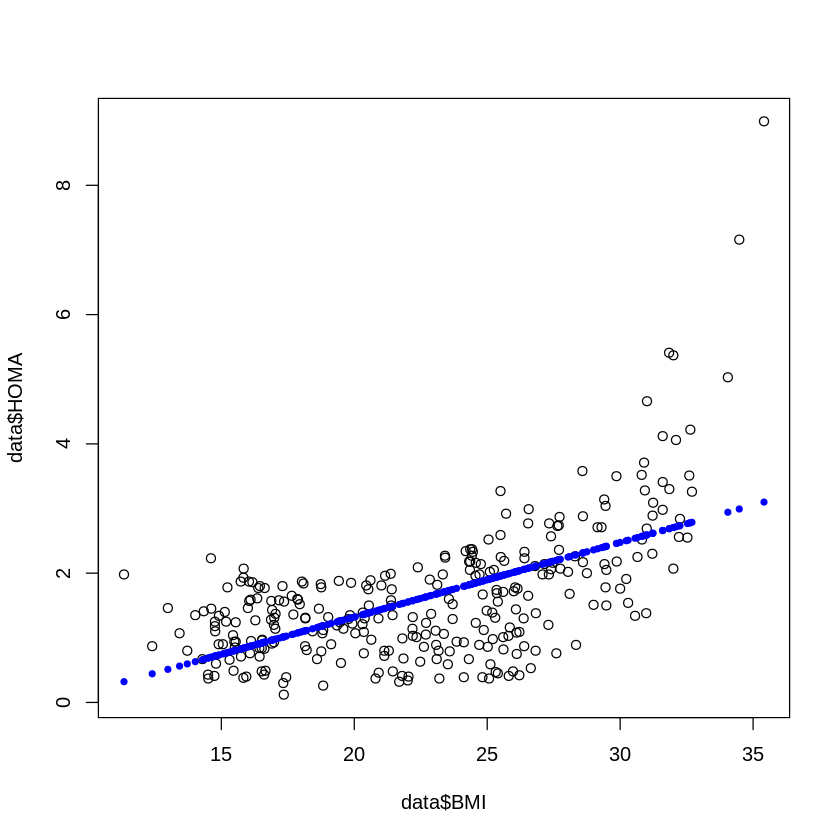

In [8]:
### Obteción del modelo. Función lm() del paquete ISLR.
### Y=HOMA, X's=BMI (índice de masa corporal) -> formula: HOMA ~ BMI
fitLM <- lm(HOMA ~ BMI, data=data)

### Visualización de la línea (azul, valores estimados) vs valores reales (negro, valores observados).
yprime = predict(fitLM,data)
plot(data$HOMA~data$BMI)
points(data$BMI,yprime,col="blue",pch=20)

### Coeficientes (Estimate), p-valores (Pr(>|t|)), R2 ajustado (Adjusted R-squared),
### estadístico F y p-valor (F-statistic y p-value)
summary(fitLM)


Call:
lm(formula = HOMA ~ Height, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8080 -0.6062 -0.1728  0.4393  6.4400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.4639     0.5467  -6.336    9e-10 ***
Height        3.6012     0.3848   9.359   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9267 on 290 degrees of freedom
Multiple R-squared:  0.232,	Adjusted R-squared:  0.2293 
F-statistic: 87.58 on 1 and 290 DF,  p-value: < 2.2e-16


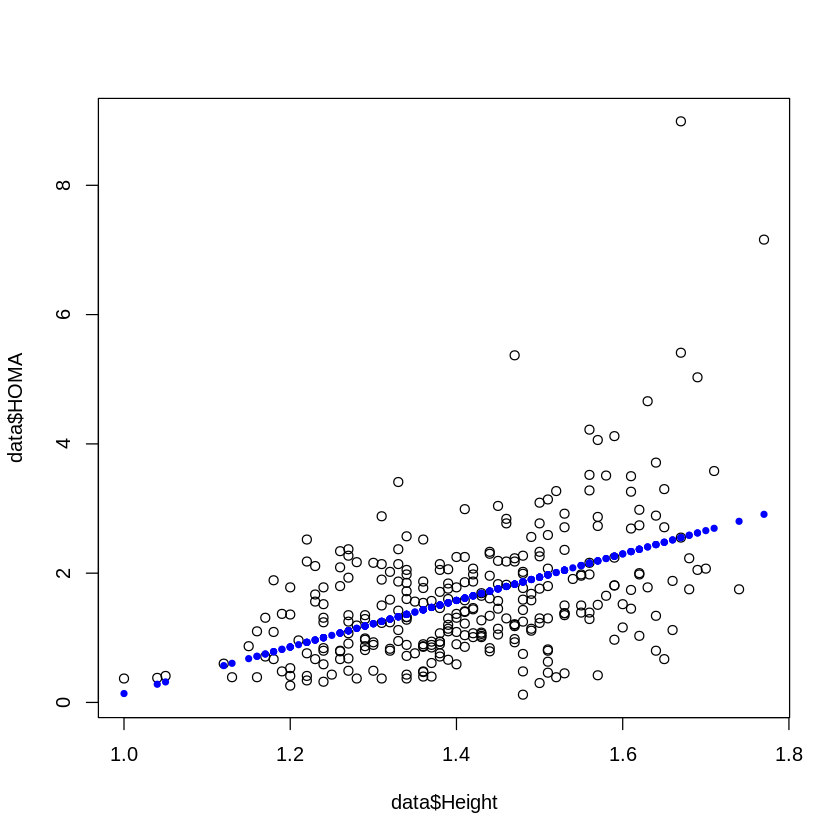

In [9]:
### Idem para la variable Height (altura)
fitLM <- lm(HOMA ~ Height, data=data)
yprime = predict(fitLM,data)
plot(data$HOMA~data$Height)
points(data$Height,yprime,col="blue",pch=20)
summary(fitLM)


Call:
lm(formula = HOMA ~ WC, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6840 -0.5542 -0.0354  0.4949  5.9256 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.175876   0.260223  -4.519 9.07e-06 ***
WC           0.036241   0.003296  10.995  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8883 on 290 degrees of freedom
Multiple R-squared:  0.2942,	Adjusted R-squared:  0.2918 
F-statistic: 120.9 on 1 and 290 DF,  p-value: < 2.2e-16


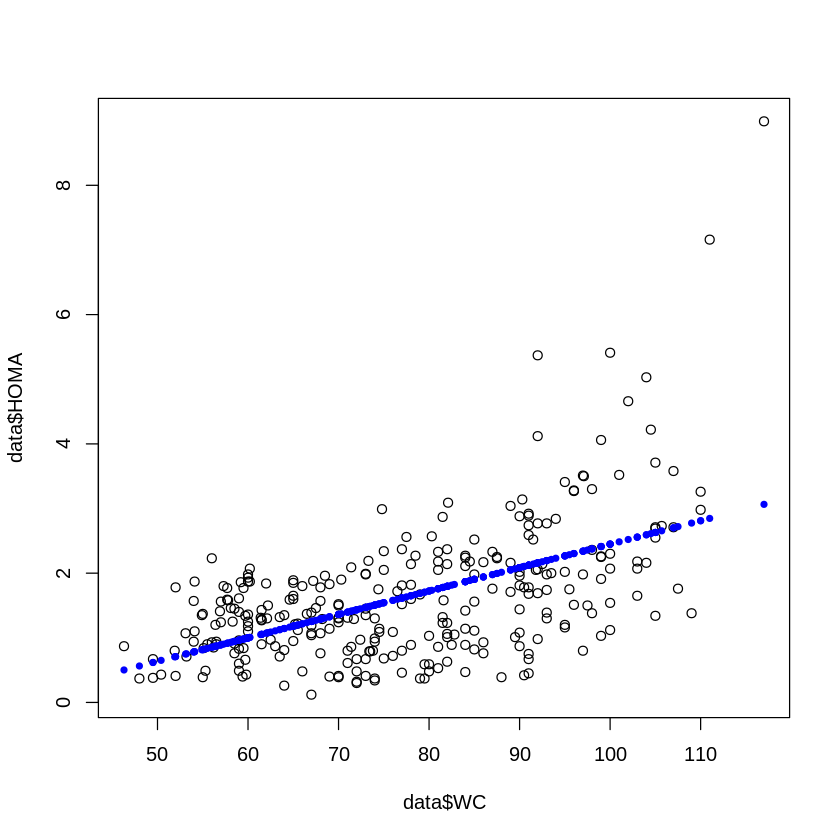

In [10]:
### Idem para la variable WC (circunferencia de la cintura)
fitLM <- lm(HOMA ~ WC, data=data)
yprime = predict(fitLM,data)
plot(data$HOMA~data$WC)
points(data$WC,yprime,col="blue",pch=20)
summary(fitLM)

Como resultado, podemos observar que los **p-valores** asociados a los **coeficientes** de las tres variables (columna con nombre "$Pr(>|t|)$") indican claramente que las **tres están relacionadas con la insulino-resistencia** (ya que adquieren p-valores muy por debajo de 0,1). Si bien es el modelo de regresión basado en ($BMI$) el que explica más variabilidad del $HOMA$ (de acuerdo a su valor de **$R^2$ ajustado**), es cierto que no presenta un valor muy alto (0,3458).


Alternativamente, repetiremos el proceso de selección de variables pero esta vez llevando a cabo el mencionado **enfoque descendente**, el cual es aplicable ya que sólo contamos con 15 variables de entrada.

## **4. SELECCIÓN ADITIVA DE VARIABLES: ENFOQUE DESCENDENTE <a id='reg2'></a>**

A continuación, dejamos atrás las **regresiones lineales simples** y pasamos a considerar el modelo de **regresión múltiple**. Como ya se indicó, seguiremos un enfoque de **selección de variables descendente**. En los siguientes bloques de código se muestran uno a uno los pasos realizados para que se pueda hacer un seguimiento de las decisiones tomadas en cada momento.

Tal y como hemos explicado en las secciones anteriores, la selección de variables mediante **enfoque descendente** se lleva a cabo incluyendo todas las variables en el modelo. Esto se consigue en *R* mediante el comando: (*Y ~ .*), donde el punto es la forma de indicar "*todas las variables de entrada disponibles en el conjunto de datos*".


In [11]:
### Obteción del modelo. Y=HOMA, X's=Todas -> formula: HOMA ~ .
fitLM <- lm(HOMA ~ ., data=data)

### Recordatorio:
### Coeficientes (Estimate), p-valores (Pr(>|t|)), R2 ajustado (Adjusted R-squared),
### estadístico F y p-valor (F-statistic y p-value)
summary(fitLM)


Call:
lm(formula = HOMA ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4294 -0.4619 -0.0636  0.4089  5.1679 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.9193063  0.9463797  -6.255 1.51e-09 ***
Sex          0.3046482  0.0961801   3.167  0.00171 ** 
Age          0.0056148  0.0431482   0.130  0.89656    
Tanner       0.1345579  0.1352788   0.995  0.32077    
Height       2.4505541  0.7621021   3.216  0.00146 ** 
BMI          0.1455896  0.0228539   6.370 7.86e-10 ***
WC          -0.0247314  0.0086550  -2.857  0.00460 ** 
TAGmgDL      0.0072443  0.0016646   4.352 1.90e-05 ***
HDLCmgDL     0.0082428  0.0040629   2.029  0.04344 *  
LDLCmgDL    -0.0031440  0.0017745  -1.772  0.07753 .  
SBP          0.0041084  0.0043852   0.937  0.34964    
DBP          0.0086374  0.0054648   1.581  0.11513    
Sedentary    0.0010000  0.0005885   1.699  0.09038 .  
Light        0.0013119  0.0010782   1.217  0.22473    
Moderate     0.0038260 

Una vez obtenido el modelo de **regresión lineal múltiple** con todas las variables de entrada, hay un punto muy importante que no debemos pasar por alto. Este es el valor obtenido para el **estadístico F**, el cual debe ser lo primero que comprobemos. Como se explicó en los conceptos básicos, si su valor es cercano a 1 y/o paralelamente su ***p-valor*** está por encima de $0,1$ o $0,15$ no existiría ninguna variable que presente relación lineal con la variable de salida *HOMA-IR*. Esta interpretación **siempre será independientemente del p-valor individual** obtenido para cada coeficiente, el cual podría engañarnos hasta que no vayamos eliminando variables de entrada redundantes o no informativas. De darse esa situación, se detendría el análisis de regresión lineal y buscaríamos otra técnica de regresión alternativa. Como ya sabíamos por los valores obtenidos en el apartado anterior, este no es el caso de nuestro conjunto de datos.

Chequeando los **p-valores** obtenidos tras este primer paso, podemos ver que el siguiente paso sería eliminar la variable $Age$ por presentar el p-valor más alto, 0,89656. Un detalle interesante es que el **$R^2$ ajustado** del modelo completo mejora con respecto a los **$R^2$** obtenidos para los modelos de regresión lineal simple del apartado anterior (alcanzando un valor de 0,4876). Para eliminar la variable $Age$ del modelo completo lo hacemos utilizando el comando *R* de signo de sustracción "-" en la fórmula, obteniendo así el nuevo modelo.

In [12]:
### Obteción del modelo. Y=HOMA, X's=Todas-Age -> formula: HOMA ~ .-Age
fitLM <- lm(HOMA ~ .-Age, data=data)

summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4365 -0.4646 -0.0683  0.4115  5.1690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.9584990  0.8955812  -6.653 1.53e-10 ***
Sex          0.3034817  0.0955914   3.175  0.00167 ** 
Tanner       0.1396497  0.1292663   1.080  0.28094    
Height       2.5180619  0.5572805   4.518 9.23e-06 ***
BMI          0.1452026  0.0226194   6.419 5.92e-10 ***
WC          -0.0245827  0.0085641  -2.870  0.00441 ** 
TAGmgDL      0.0072474  0.0016615   4.362 1.82e-05 ***
HDLCmgDL     0.0083213  0.0040108   2.075  0.03894 *  
LDLCmgDL    -0.0031315  0.0017687  -1.771  0.07774 .  
SBP          0.0040640  0.0043641   0.931  0.35255    
DBP          0.0086128  0.0054518   1.580  0.11529    
Sedentary    0.0010094  0.0005831   1.731  0.08455 .  
Light        0.0012833  0.0010537   1.218  0.22431    
Moderate     0.0038748  0.0047594   0.814  0.41627    
Vigorous    -0.00

Tras eliminar $Age$, se puede ver cómo el nuevo **$R^2$ ajustado** del modelo incluso mejora. Esto es el resultado de eliminar una variable que no aportaba nada al modelo. El siguiente paso, en vista de los resultados obtenidos, será eliminar la variable de actividad física $Moderate$.

In [13]:
### Idem al anterior -Moderate
fitLM <- lm(HOMA ~ .-Age-Moderate, data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ . - Age - Moderate, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3679 -0.4614 -0.0789  0.4085  5.1735 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.8816129  0.8900476  -6.608 1.98e-10 ***
Sex          0.2850872  0.0928265   3.071  0.00234 ** 
Tanner       0.1457291  0.1289721   1.130  0.25948    
Height       2.5165450  0.5569393   4.519 9.22e-06 ***
BMI          0.1475379  0.0224231   6.580 2.34e-10 ***
WC          -0.0252296  0.0085219  -2.961  0.00334 ** 
TAGmgDL      0.0072720  0.0016602   4.380 1.68e-05 ***
HDLCmgDL     0.0084659  0.0040044   2.114  0.03539 *  
LDLCmgDL    -0.0032874  0.0017572  -1.871  0.06243 .  
SBP          0.0041578  0.0043599   0.954  0.34109    
DBP          0.0079398  0.0053855   1.474  0.14154    
Sedentary    0.0009849  0.0005820   1.692  0.09168 .  
Light        0.0016399  0.0009578   1.712  0.08799 .  
Vigorous    -0.0031646  0.0047472  -0.667  0.50556    
---
Si

Conforme se van eliminando variables no informativas, vemos como el valor **$R^2$ ajustado** del modelo resultante sigue mejorando poco a poco. La siguiente variable a eliminar es $Vigorous$ (referida a los minutos diarios de actividad física vigorosa de los sujetos).

En este punto queda perfectamente claro como debe acometerse el proceso de ir eliminando variables no informativas de una en una. Siempre debemos hacerlo así aunque resulte tedioso. En lo que sigue se mostrarán los siguientes pasos comentados hasta llegar al último paso (modelo final), el cual si que ejecutaremos para ver a qué se llega finalmente. Por favor, recuerde leer también los comentarios en línea con detenimiento.

In [14]:
#fitLM <- lm(HOMA ~ .-Age-Moderate-Vigorous, data=data)
#summary(fitLM)
#fitLM <- lm(HOMA ~ .-Age-Moderate-Vigorous-SBP, data=data)
#summary(fitLM)
#fitLM <- lm(HOMA ~ .-Age-Moderate-Vigorous-SBP-Tanner, data=data)
#summary(fitLM)

### En el modelo anterior ya todos los p-valores se podrían considerar correctos.
### Por simplicidad hemos seguido quitando mientras el R2 ajustado apenas se ha visto afectado.
#fitLM <- lm(HOMA ~ .-Age-Moderate-Vigorous-SBP-Tanner-Light, data=data)
#summary(fitLM)
#fitLM <- lm(HOMA ~ .-Age-Moderate-Vigorous-SBP-Tanner-Light-Sedentary, data=data)
#summary(fitLM)

### A partir de aquí R2 empezaría a empeorar significativamente.
### Paramos y reformulamos por legibilidad indicando las variables de entrada seleccionadas de manera aditiva
### Este modelo es equivalente al inmediatamente anterior pero muestra con claridad lo seleccionado
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP, data=data) #Vea que ya no se incluye el punto
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4022 -0.4525 -0.0408  0.3880  5.0570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.133154   0.656353  -7.821 1.05e-13 ***
BMI          0.156909   0.021985   7.137 8.04e-12 ***
Height       2.764817   0.413419   6.688 1.21e-10 ***
TAGmgDL      0.007288   0.001646   4.428 1.36e-05 ***
Sex          0.307461   0.090695   3.390 0.000798 ***
WC          -0.027091   0.008387  -3.230 0.001383 ** 
LDLCmgDL    -0.003229   0.001751  -1.844 0.066178 .  
HDLCmgDL     0.008966   0.003986   2.250 0.025241 *  
DBP          0.009670   0.005138   1.882 0.060843 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7567 on 283 degrees of freedom
Multiple R-squared:  0.5002,	Adjusted R-squared:  0.4861 
F-statistic:  35.4 on 8 and 283 DF,  p-value: < 2.2e-16


Como resultado, obtenemos un modelo con 8 variables de entrada y un **$R^2$ ajustado** de 0,4861.

## **5. INTERACCIONES Y NO LINEALIDAD <a id='reg3'></a>**

Una vez hemos seleccionado las variables de entrada que deben incorporarse a nuestro **modelo lineal**, intentaremos poder explicar la parte **no lineal** de los datos mediante la adición de **interacciones y otros términos no lineales**. Para probar interacciones nos basamos en el conocimiento previo que tengamos del problema (por ejemplo, en un caso de interacción genética conocida entre dos variantes genéticas, sería apropiado introducir un término de interacción entre ambas para modelar su efecto sobre la variable de salida). En caso de que no haya información previa sobre fenómenos de interacción, también podremos guiarnos por la lógica o intuición según el significado de las variables de entrada. Si aún así no caemos en ninguna posible interacción, podemos hacer pruebas aleatorias entre las variables que se han mostrado más significativas (ensayo-error). Este procedimiento no es un proceso trivial y depende de nuestra propia habilidad y experiencia.

En nuestro caso de estudio sobre obesidad infantil, vamos a comprobar si existe sinergia positiva (factores multiplicativos, $*$) entre la variable de trigliceridos y las dos medidas de colesterol (por pertenecer todas ellas al perfil lipídico).

In [15]:
### Interacciones entre triglicéridos y colesteroles
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+TAGmgDL*HDLCmgDL*LDLCmgDL, data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + TAGmgDL * HDLCmgDL * LDLCmgDL, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5603 -0.4625 -0.0600  0.3862  4.9757 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -4.756e+00  1.512e+00  -3.144 0.001844 ** 
BMI                        1.580e-01  2.221e-02   7.113 9.59e-12 ***
Height                     2.799e+00  4.170e-01   6.712 1.07e-10 ***
TAGmgDL                    1.097e-02  1.748e-02   0.627 0.531002    
Sex                        3.130e-01  9.187e-02   3.408 0.000752 ***
WC                        -2.775e-02  8.486e-03  -3.270 0.001209 ** 
LDLCmgDL                  -9.731e-03  1.388e-02  -0.701 0.483962    
HDLCmgDL                   1.049e-03  2.518e-02   0.042 0.966806    
DBP                        9.692e-03  5.168e-03   1.876 0.061766 .  
TAGmgDL:HDLCmgDL          -7.809e-05  3.563e-04  -0.219 0.826

Véase que el uso de operadores ya incluye todos los términos de jerarquía. Si no lo hiciese, tendríamos que añadirlos a mano antes de mirar ningún p-valor, ni de tomar decisión alguna. Podemos ver cómo el término *TAGmgDL:LDLCmgDL:HDLCmgDL* presenta un p-valor realmente malo (0,961424), indicando que no existe dicha interacción hipotetizada.

Probaremos de nuevo con la altura y la circunferencia de la cintura.

In [16]:
### Interacciones entre altura y la circunferencia de la cintura
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+Height*WC, data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + Height * WC, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5403 -0.4401 -0.0268  0.4154  4.3876 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.916865   2.172910   2.263  0.02441 *  
BMI          0.159749   0.021173   7.545 6.27e-13 ***
Height      -4.246495   1.504020  -2.823  0.00509 ** 
TAGmgDL      0.007283   0.001584   4.597 6.49e-06 ***
Sex          0.275412   0.087561   3.145  0.00184 ** 
WC          -0.159204   0.028498  -5.587 5.45e-08 ***
LDLCmgDL    -0.003340   0.001685  -1.982  0.04844 *  
HDLCmgDL     0.008494   0.003838   2.213  0.02769 *  
DBP          0.010512   0.004949   2.124  0.03453 *  
Height:WC    0.090497   0.018721   4.834 2.20e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7285 on 282 degrees of freedom
Multiple R-squared:  0.5384,	Adjusted R-squared: 

En este caso si podemos ver cómo la interacción explica parte de esa **no linealidad** (al obtener un p-valor inferior a 0.1). En principio nos la quedamos como parte del modelo.

Por último, probaremos otros términos de **no linealidad**. En este caso, teniendo en cuenta que inicialmente graficamos todas las variables de entrada respecto a la variable de salida *HOMA-IR*, resulta bastante más sencillo determinar ciertos tipos de comportamientos no lineales de manera visual. En concreto, vimos que la variable de salida $HOMA-IR$ parecía tener una relación cuadrática con $BMI$. Probaremos, por lo tanto, a incluir dicho término. La forma de hacerlo es mediante la función $I(.)$ de $R$. La potencia se indica de la siguiente manera: $I(X_j \hat{} exponente)$. En nuestro caso $I(BMI \hat{} 2)$. La función $I(.)$ no genera automáticamente los términos de jerarquía, por lo que antes de mirar siquiera el modelo debemos asegurarnos de que todos los términos de jerarquía están en la fórmula. Para el caso que nos aplica, los terminos de jerarquía serían: $BMI + BMI^2 + Height + WC + Height*WC$

In [18]:
### Interacciones entre altura y la circunferencia de la cintura, más BMI^2
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+Height*WC+I(BMI^2), data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + Height * WC + I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9267 -0.3865  0.0019  0.3615  3.4774 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.308654   1.964056   2.194  0.02907 *  
BMI         -0.443050   0.077356  -5.727 2.62e-08 ***
Height       0.682096   1.490290   0.458  0.64753    
TAGmgDL      0.006089   0.001439   4.232 3.14e-05 ***
Sex          0.237497   0.079227   2.998  0.00296 ** 
WC          -0.041319   0.029621  -1.395  0.16414    
LDLCmgDL    -0.002949   0.001523  -1.936  0.05383 .  
HDLCmgDL     0.005186   0.003491   1.486  0.13852    
DBP          0.005995   0.004505   1.331  0.18434    
I(BMI^2)     0.012615   0.001569   8.042 2.48e-14 ***
Height:WC    0.016942   0.019224   0.881  0.37890    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.658 on 281 degr

De nuevo, aparecen términos con p-valores altos, como es el caso de $Height*WC$. La interacción estaba intentando explicar lo que ahora el término $BMI$ cuadrático explica mejor. Quitaremos por lo tanto la interacción ahora no significativa. Recordemos que la variable BMI ya mostraba claramente un aspecto no lineal cuadrático en el gráfico.

In [19]:
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+DBP+I(BMI^2), data=data)
summary(fitLM)


Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    HDLCmgDL + DBP + I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8747 -0.3846 -0.0021  0.3674  3.5269 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.821314   1.004299   2.809  0.00531 ** 
BMI         -0.474890   0.068374  -6.945 2.61e-11 ***
Height       1.954571   0.369059   5.296 2.39e-07 ***
TAGmgDL      0.006028   0.001437   4.196 3.64e-05 ***
Sex          0.240162   0.079138   3.035  0.00263 ** 
WC          -0.016037   0.007380  -2.173  0.03060 *  
LDLCmgDL    -0.002912   0.001522  -1.914  0.05666 .  
HDLCmgDL     0.005082   0.003488   1.457  0.14619    
DBP          0.005638   0.004485   1.257  0.20978    
I(BMI^2)     0.013273   0.001379   9.624  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6577 on 282 degrees of freedom
Multiple R-squared:  0.6238,	Adjusted R-squared:  0.

De acuerdo al nuevo modelo, ahora habría que eliminar $DBP$.

In [ ]:
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+HDLCmgDL+I(BMI^2), data=data)
summary(fitLM)

Y por último $HDLCmgDL$.

En una línea de código adicional, incluimos también cómo calcular la métrica **RECM** para un modelo de regresión lineal (la cual no aparecía en el *output* de resultados ofrecido por el comando *summary*).

* **RECM (*Root Mean Squared Error -RMSE-* en inglés)**: La raíz del error cuadrático medio es la raíz cuadrada de la varianza de los residuos. En este caso, sólo se usa *RSS* (diferencias al cuadrado), por lo que es aplicable a los modelos obtenidos por cualquier técnica de regresión. RECM indica el ajuste absoluto del modelo a los datos: cuán cerca están los puntos de datos observados de los valores pronosticados por el modelo. Siendo $n$ el número de datos y $e_i$ cada una de las diferencias entre dato observado y valor pronosticado por el modelo ($e_i = y_i-y_i^{\prime}$), RECM se puede calcular como:

<center>$RECM = \sqrt{\frac{1}{n}\sum_{i=1}^{n}e_i^2}$ </center>

In [21]:
fitLM <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+I(BMI^2), data=data)

### Cálculo de RECM
yprime = predict(fitLM,data)
cat('\nRMSE:', sqrt(sum((data$HOMA-yprime)^2)/length(yprime)), "\n") #RECM->en inglés RMSE

summary(fitLM)


RMSE: 0.6507716 



Call:
lm(formula = HOMA ~ BMI + Height + TAGmgDL + Sex + WC + LDLCmgDL + 
    I(BMI^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8923 -0.3932  0.0004  0.3582  3.5091 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.797671   0.874612   4.342 1.97e-05 ***
BMI         -0.495014   0.067751  -7.306 2.79e-12 ***
Height       1.952522   0.369506   5.284 2.52e-07 ***
TAGmgDL      0.005433   0.001379   3.940 0.000103 ***
Sex          0.224973   0.078613   2.862 0.004526 ** 
WC          -0.016985   0.007322  -2.320 0.021069 *  
LDLCmgDL    -0.002803   0.001523  -1.841 0.066719 .  
I(BMI^2)     0.013684   0.001368  10.006  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6599 on 284 degrees of freedom
Multiple R-squared:  0.6186,	Adjusted R-squared:  0.6092 
F-statistic: 65.81 on 7 and 284 DF,  p-value: < 2.2e-16


Y visualizamos

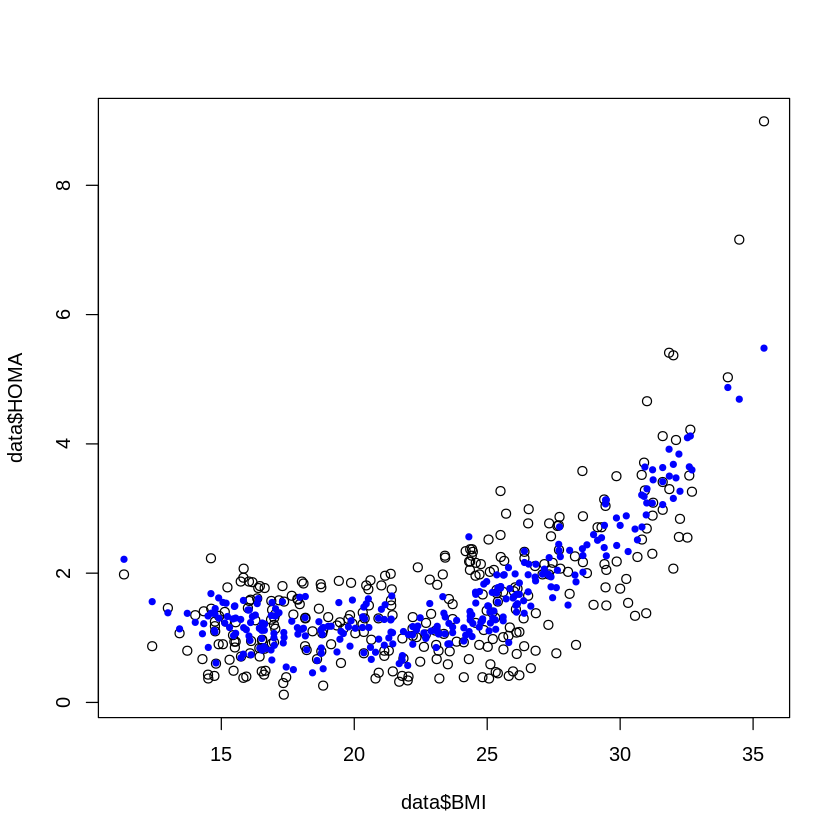

In [24]:
plot(data$HOMA~data$BMI)
points(data$BMI,yprime,col="blue",pch=20)

Finalmente, hemos llegado hasta un **$R^2$ ajustado** de 0,6092 cuando partíamos de 0,3458. Pero lo más importante no es dicho valor en sí, sino lo que hemos podido aprender sobre los datos y de nuestro problema basándonos en valores estadísticos. Como principal conclusión, podemos extraer que un alto índice de masa corporal en niños es uno de los principales factores de riesgo para padecer insulino-resistencia. Pensemos que incluso aunque la conclusión fuese que tenemos que replantear el problema con nuevas variables y mediciones, ya es un gran paso el poder darse cuenta.

## **6. VALIDACIÓN CRUZADA <a id='reg4'></a>**

Una vez que ya tenemos planteada la mejor fórmula para aplicar el ajuste paramétrico (modelo de regresión), si quisieramos estimar nuevos valores de la variable de salida y comparar su habilidad predictiva con otros modelos deberíamos aplicar una validación cruzada por los motivos que se explicaron en la clase anterior. A continuación, se muestra como poder hacerlo.

In [25]:
set.seed(123456)
k <- 5
data$kfold <- sample(1:k, nrow(data), replace = T)

performances <- c()

# One iteration per fold
for (fold in 1:k){
  # Se crea el conjunto de entrenamiento para la iteración
  training_set <- data[data$kfold != fold,]
  nombres <- names(training_set)
  tam <- length(nombres)-1
  training_set <- training_set[,nombres[1: tam]]

  # Create test set for this iteration
  # Subset all the datapoints where .folds matches the current fold
  testing_set <- data[data$kfold == fold,]
  nombres <- names(testing_set)
  tam <- length(nombres)-1
  testing_set <- testing_set[,nombres[1: tam]]

  ## Entrenando el modelo para la iteración
  model <- lm(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+I(BMI^2), data=training_set)

  ## Calculando el error de test
  yprime <- predict(model, testing_set)
  RMSE <- sqrt(sum((testing_set$HOMA-yprime)^2)/length(yprime))

  # Add the RMSE to the performance list
  performances[fold] <- RMSE
}

#Eliminamos la columna artificial añadida para kfold
#(para que no acumule columnas si se ejecuta varias veces)
nombres <- names(data)
tam <- length(nombres)-1
data <- data[,nombres[1: tam]]

cat("RECM medio en test para 5-fcv:", mean(performances))

RECM medio en test para 5-fcv: 0.6956061

## **REFERENCIAS BIBLIOGRÁFICAS <a id='ref'></a>**

-	Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.
An Introduction to Statistical Learning with Applications in R
Springer, 2013 (**Chapter 03**)
-	McDonald, J.H. Handbook of Biological Statistics (3rd ed.). Sparky House Publishing, Baltimore, Maryland, 2014. Pages 190-208 in the printed version
- Usando rpy2 en notebooks: https://rpy2.github.io/doc/latest/html/generated_rst/notebooks.html
- Usando read.csv de R: https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/read.table
- Usando ISLR: https://cran.r-project.org/web/packages/ISLR/index.html

## **REFERENCIAS ADICIONALES**

-	M.J. Gacto, J.M. Soto-Hidalgo, J. Alcalá-Fdez, and R. Alcalá (2019). Experimental Study on 164 Algorithms Available in Software Tools for Solving Standard Non-Linear Regression Problems. IEEE Access 7, 2019, pp. 108916-108939; https://doi.org/10.1109/ACCESS.2019.2933261